## Provider Eligibility Assessment

- PNDS data is matched against information on professional licensing, Office of Professional Medical Care sanctions, and Medicaid and Medicare provider eligibility, to assure that only qualified providers are delivering health care to plan members. Facilities are checked for valid operating certificate numbers and that operating certificate numbers match the type of facility indicated.

In [1]:
# Future Imports
from __future__ import absolute_import, division, print_function, unicode_literals

# Dajta Cleaning/ Wrangling
import os
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from copy import deepcopy
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_dataset(filename):
    '''
    '''
    dataframe = pd.read_csv(filename, dtype='unicode')
    return dataframe

df = load_dataset('NYSDOH_PNDS_IndividualProviderData_2012Q_20000_rows.csv')

In [3]:
# Checking the first 5 entries of the data
df.head()

,Lname,Fname,npi,licnum,medsid,planid,sitename,rmnumber,staddres,city,...,Lang3,Lang4,Lang5,Lang6,Lang7,areacode,phone,planno,plan,subtime
0,LIU,XIN-HUI,1245565456,946,NaN,NaN,"LIU, XIN-HUI",NaN,42-11 College Point Blvd,FLUSHING,...,NaN,ZH,NaN,NaN,NaN,718,3219688,1234037,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
1,DU,KEPING,1649397084,1481,NaN,NaN,"DU, KEPING",NaN,193 N Wellwood Ave,LINDENHURST,...,NaN,ZH,NaN,NaN,NaN,917,2997486,1234037,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
2,LI,CHANGSHENG,1154554996,2681,NaN,NaN,CHANG SHENG LI,NaN,175 KING STREET,CHAPPAGUA,...,NaN,ZH,NaN,NaN,NaN,914,2380041,1234037,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
3,MOLLICA,PETER,1285683508,3105,NaN,NaN,PETER W MOLLICA.,NaN,585 Schenectady Ave..,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,718,6045388,1234037,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
4,HARRIS,MARIANTHA,1275615973,3547,NaN,NaN,BRONX METRO HEALTHCARE MEDICAL PC,NaN,432 EAST 149 ST,BRONX,...,NaN,NaN,NaN,NaN,NaN,718,6187522,1234037,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00


In [4]:
df.shape

(885383, 90)

In [5]:
df.describe().T

,count,unique,top,freq
Lname,31499,10330,LEE,113
Fname,31499,5651,DAVID,458
npi,31499,13131,8888888888,171
licnum,31499,12980,162663,64
medsid,31185,11513,88888888,2559
planid,23754,15728,W38171,89
sitename,27127,4758,NEW YORK NETWORK MANAGEMENT,1681
rmnumber,6859,1098,2ND FLOOR,305
staddres,31499,8272,1 GUSTAVE L LEVY PL,340
city,31499,360,BROOKLYN,8851


##### Based on our problem statement, we need to select only features which will contribute in our findings. Hence, other features will be discarded.

In [6]:
def preprocessing(data):
    '''
    '''
    data2 = data[['sitename','npi', 'licnum', 'city', 'wheelchr', 'Primdesg', 'provtype', 'brdstat', 'gender']]
    
    data2 = data2.rename(columns={'npi': 'identification_number', 'licnum': 'license_number', 'Primdesg': 'designation', \
                          'provtype': 'speciality', 'brdstat': 'certification'}, copy=True)
    
    mappings = {'1': 'MD', '12': 'DO', '23': 'Physician Assistant (PA)', '20': 'Acupuncturist', '30': 'Audiologist', \
                '10': 'Chiropractor', '4': 'CSW', '5': 'Clinical Psych', '14': 'Psychologist', '15': 'Counselor', \
                '16': 'Social Work', '08': 'DDS', '18': 'DMD', '19': 'MS', '40': 'CDN Dietician/Nutritionist', \
                '2': 'CNP Nurse Practitioner', '3': 'CNM', '22': 'RN', '50': 'CM (not a nurse)', '6': 'OD Optometrist'}
    
    mappings2 = {'1': 'PCP', '2': 'Specialist', '3': 'PCP AND Specialist'}
    
    data2['designation'] = data2.designation.map(mappings2)
    data2['speciality'] = data2.speciality.map(mappings)
    data2['gender'] = data2.gender.map({'1': 'Male', '2': 'Female'})
    
    data2.dropna(axis=0, how='all', inplace=True)
    
    data2 = data2.astype({'identification_number': 'int64', 'license_number': 'int', 'wheelchr': 'int', 'speciality': 'int', \
                  'wheelchr': 'category', 'designation': 'category', 'speciality': 'category', 'certification': 'category', \
                  'gender': 'category'})
    
    return data2

dataframe = preprocessing(df)

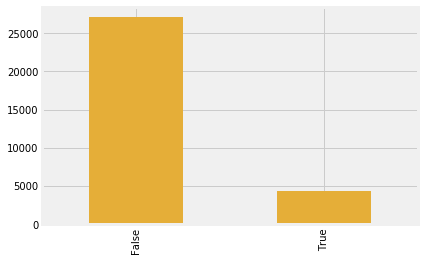

In [7]:
# Checking the null values 
dataframe.sitename.isnull().value_counts().plot(kind='bar', color=sns.color_palette()[2])
plt.show()

##### Above graph show us that we have so many sitenames that has not been recorded. We can remove the data but we will keep it in case we needed any information.

In [8]:
dataframe.shape

(31499, 9)

In [9]:
dataframe.head()

,sitename,identification_number,license_number,city,wheelchr,designation,speciality,certification,gender
0,"LIU, XIN-HUI",1245565456,946,FLUSHING,1,Specialist,Acupuncturist,1,Male
1,"DU, KEPING",1649397084,1481,LINDENHURST,1,Specialist,Acupuncturist,1,Female
2,CHANG SHENG LI,1154554996,2681,CHAPPAGUA,1,Specialist,Acupuncturist,2,Female
3,PETER W MOLLICA.,1285683508,3105,BROOKLYN,1,Specialist,NaN,1,Male
4,BRONX METRO HEALTHCARE MEDICAL PC,1275615973,3547,BRONX,0,Specialist,Physician Assistant (PA),1,Female


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31499 entries, 0 to 31498
Data columns (total 9 columns):
sitename                 27127 non-null object
identification_number    31499 non-null int64
license_number           31499 non-null int32
city                     31499 non-null object
wheelchr                 31499 non-null category
designation              31499 non-null category
speciality               19582 non-null category
certification            31499 non-null category
gender                   31499 non-null category
dtypes: category(5), int32(1), int64(1), object(2)
memory usage: 1.2+ MB


## Data Exploration

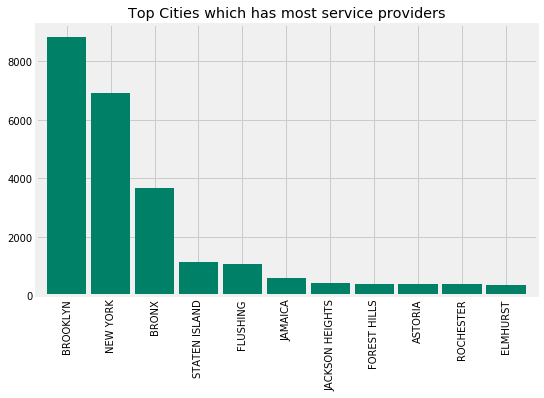

In [11]:
# Checking the top cities which has service providers
plt.figure(figsize=(8,5))
dataframe.city.value_counts()[0:11].plot(kind = 'bar', width = 0.9, cmap='summer')
plt.title('Top Cities which has most service providers')
plt.show()

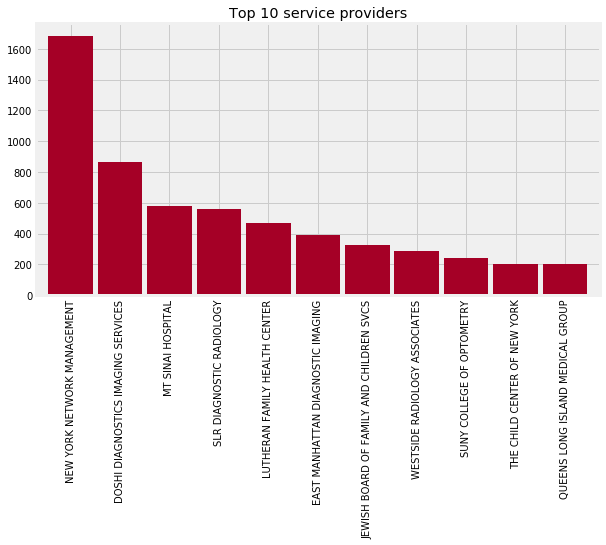

In [12]:
## Checking the top 10 service providers
plt.figure(figsize = (9,5))
dataframe.sitename.value_counts()[0:11].plot(kind = 'bar', width = 0.9, cmap = 'RdYlGn')
plt.title("Top 10 service providers")
plt.show()

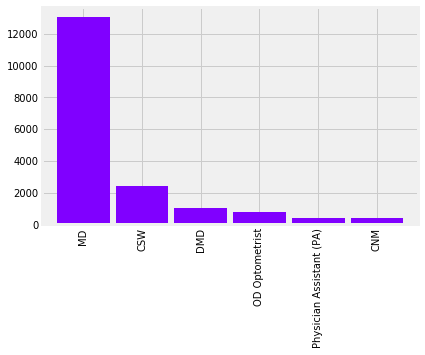

In [13]:
## Checking the most speciality providers
dataframe.speciality.value_counts()[0:6].plot.bar(width = 0.9, cmap = 'rainbow')
plt.show()

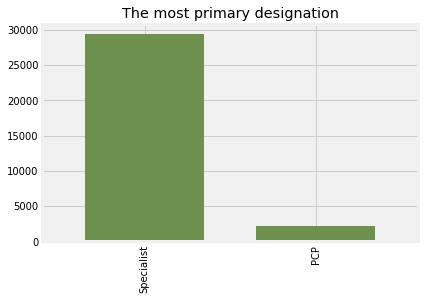

In [14]:
## Checking the most primary designation
dataframe.designation.value_counts().plot(kind = 'bar', width = 0.7, color=sns.color_palette()[3])
plt.title("The most primary designation")
plt.show()

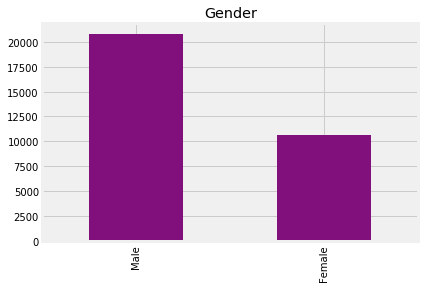

In [15]:
dataframe.gender.value_counts().plot(kind='bar', color=sns.color_palette()[5])
plt.title("Gender")
plt.show()